In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

from sklearn import tree
import dtreeviz as dtree

import numpy as np
import matplotlib.pyplot as plt


In [4]:
x_train = pd.read_csv("x_train.csv",index_col=False)
y_train = pd.read_csv("y_train.csv",index_col=False)
x_test = pd.read_csv("x_test.csv",index_col=False)
y_test = pd.read_csv("y_test.csv",index_col=False)

In [5]:
model = RandomForestClassifier(n_estimators=603, max_depth=25, random_state=0,criterion='entropy') 

# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output
train=str(model.score(x_train,y_train))
test= str(model.score(x_test,y_test))
print("Train: "+ train +" Test: " +test)

C:\Users\ivanl\AppData\Local\Temp/ipykernel_84668/1178382749.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Train: 0.8546539400203232 Test: 0.7423310752127844


In [6]:
labels = [
    'Falta de pago. Reclamación.',
    'Error en la emisión',
    'Falta de pago. Insolvencia.',
    'Falta de formalización',
    'Reemplazo',
    'Traspaso',
    'Cese o venta del riesgo',
    'Anulación asegurado por carta',
    'Ilocalizable tomador',
    'Fin riesgo.Temporal',
    'Siniestralidad',
    'Desaparición del riesgo',
    'Convenio anulación',
    'Baja no circula',
    'Competencia',
    'Venta riesgo'
    ]

In [7]:
#Resultado antiguo sin over samplig
y_pred = model.predict(x_test)
aux=confusion_matrix(y_test, y_pred) #, labels=labels)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.83      0.84      0.83      3302
         2.0       0.79      0.66      0.72      1096
         3.0       0.81      0.87      0.84      4672
         4.0       0.76      0.49      0.60       656
         5.0       0.78      0.63      0.70      3288
         6.0       0.68      0.72      0.70      2386
         7.0       0.72      0.74      0.73      4927
         8.0       0.63      0.76      0.69      4490
         9.0       0.73      0.36      0.48       111
        10.0       0.75      0.74      0.75       673
        11.0       0.80      0.61      0.69       846
        12.0       0.54      0.23      0.32       392
        13.0       0.77      0.69      0.73       213
        17.0       0.90      0.88      0.89       807
        20.0       0.75      0.40      0.52       158
        25.0       0.66      0.77      0.71       768

    accuracy                           0.74     28785
   macro avg       0.74   

Metricas

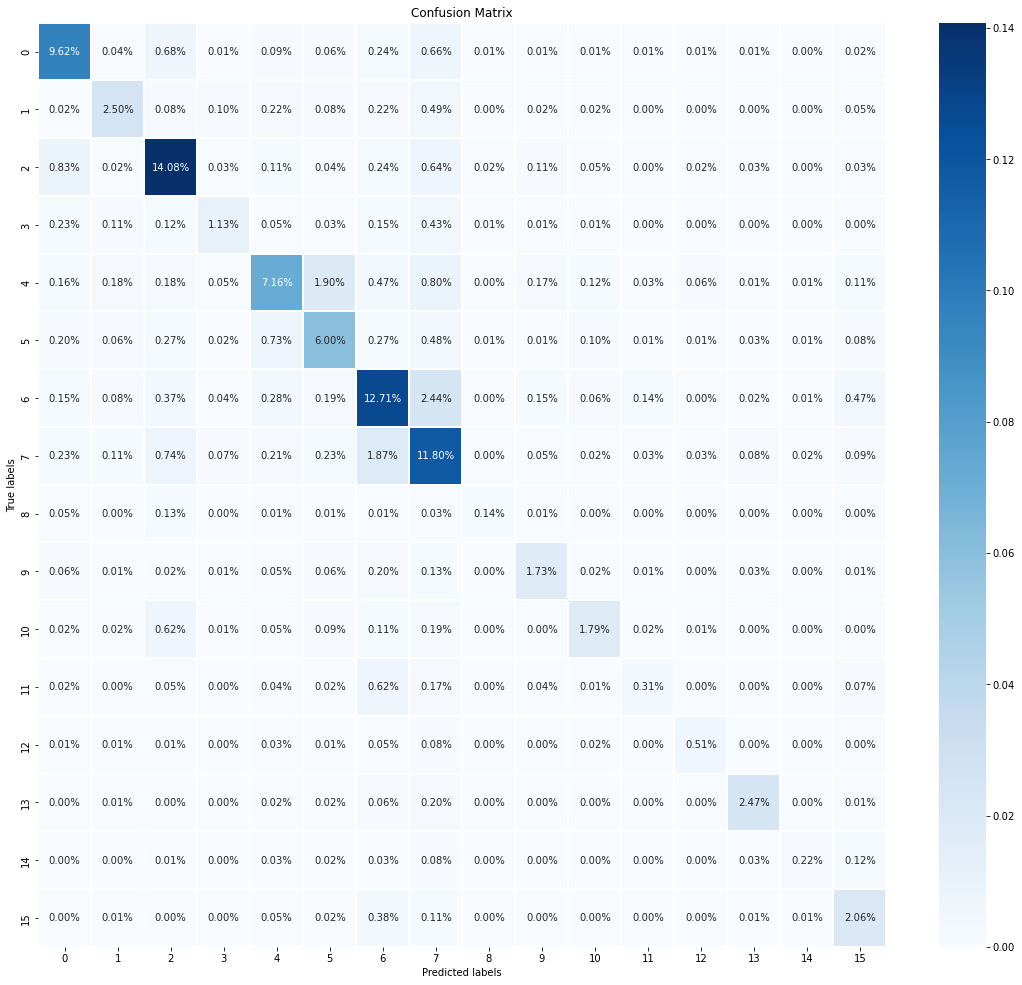

In [8]:
plt.figure(figsize = (19,17))
ax = sns.heatmap(aux/np.sum(aux), annot=True,linewidths=1, fmt=".2%", cmap='Blues')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

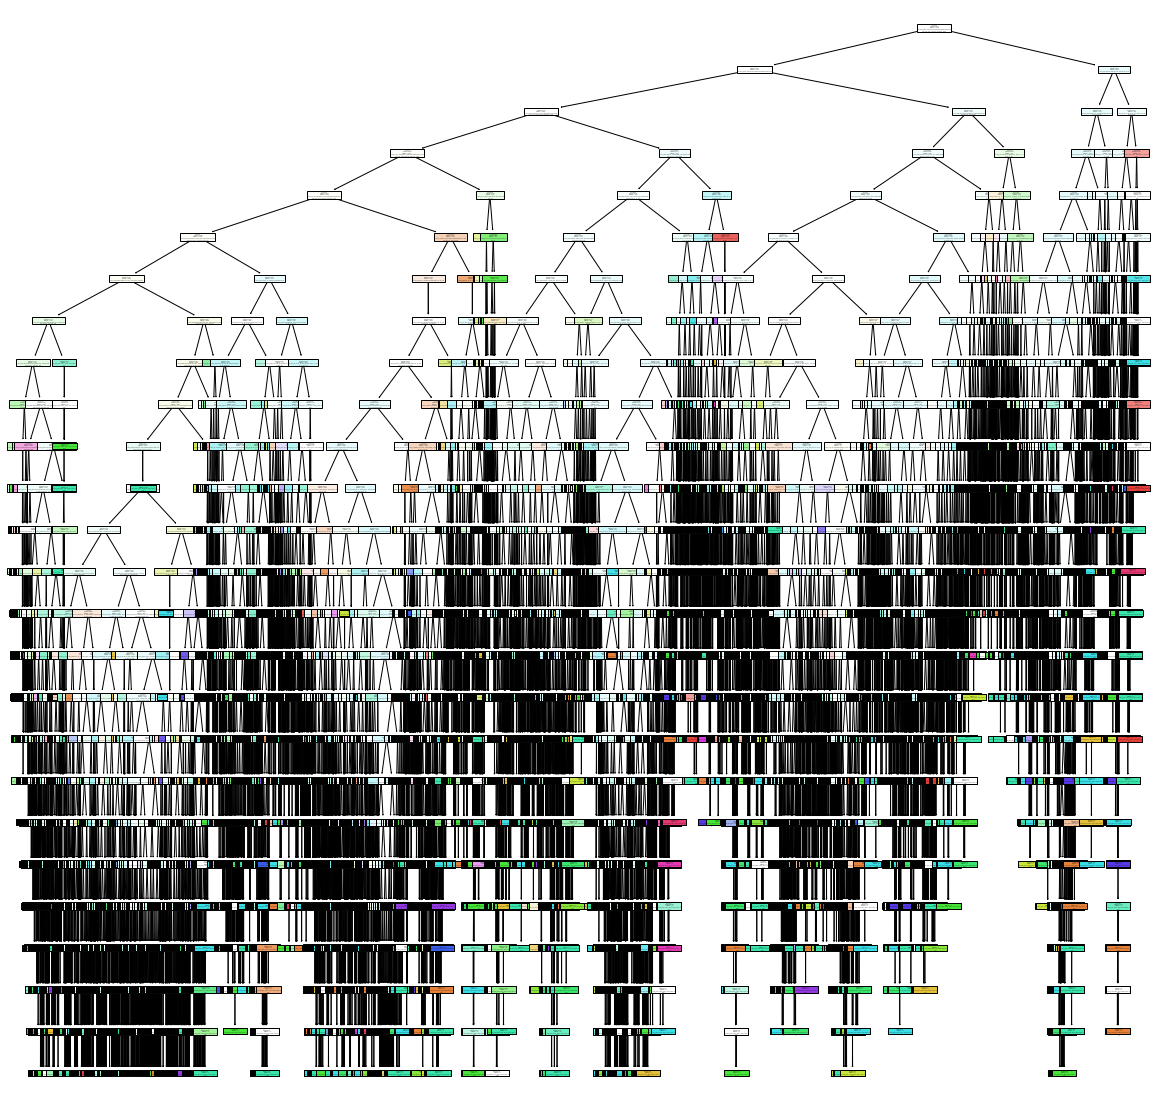

In [9]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(model.estimators_[0], feature_names=x_train.columns, filled=True)

In [10]:
expandedTree = RandomForestClassifier(n_estimators=603, max_depth=3, random_state=0,criterion='entropy')
expandedTree.fit(x_train,y_train)

C:\Users\ivanl\AppData\Local\Temp/ipykernel_84668/3109651206.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=603,
                       random_state=0)

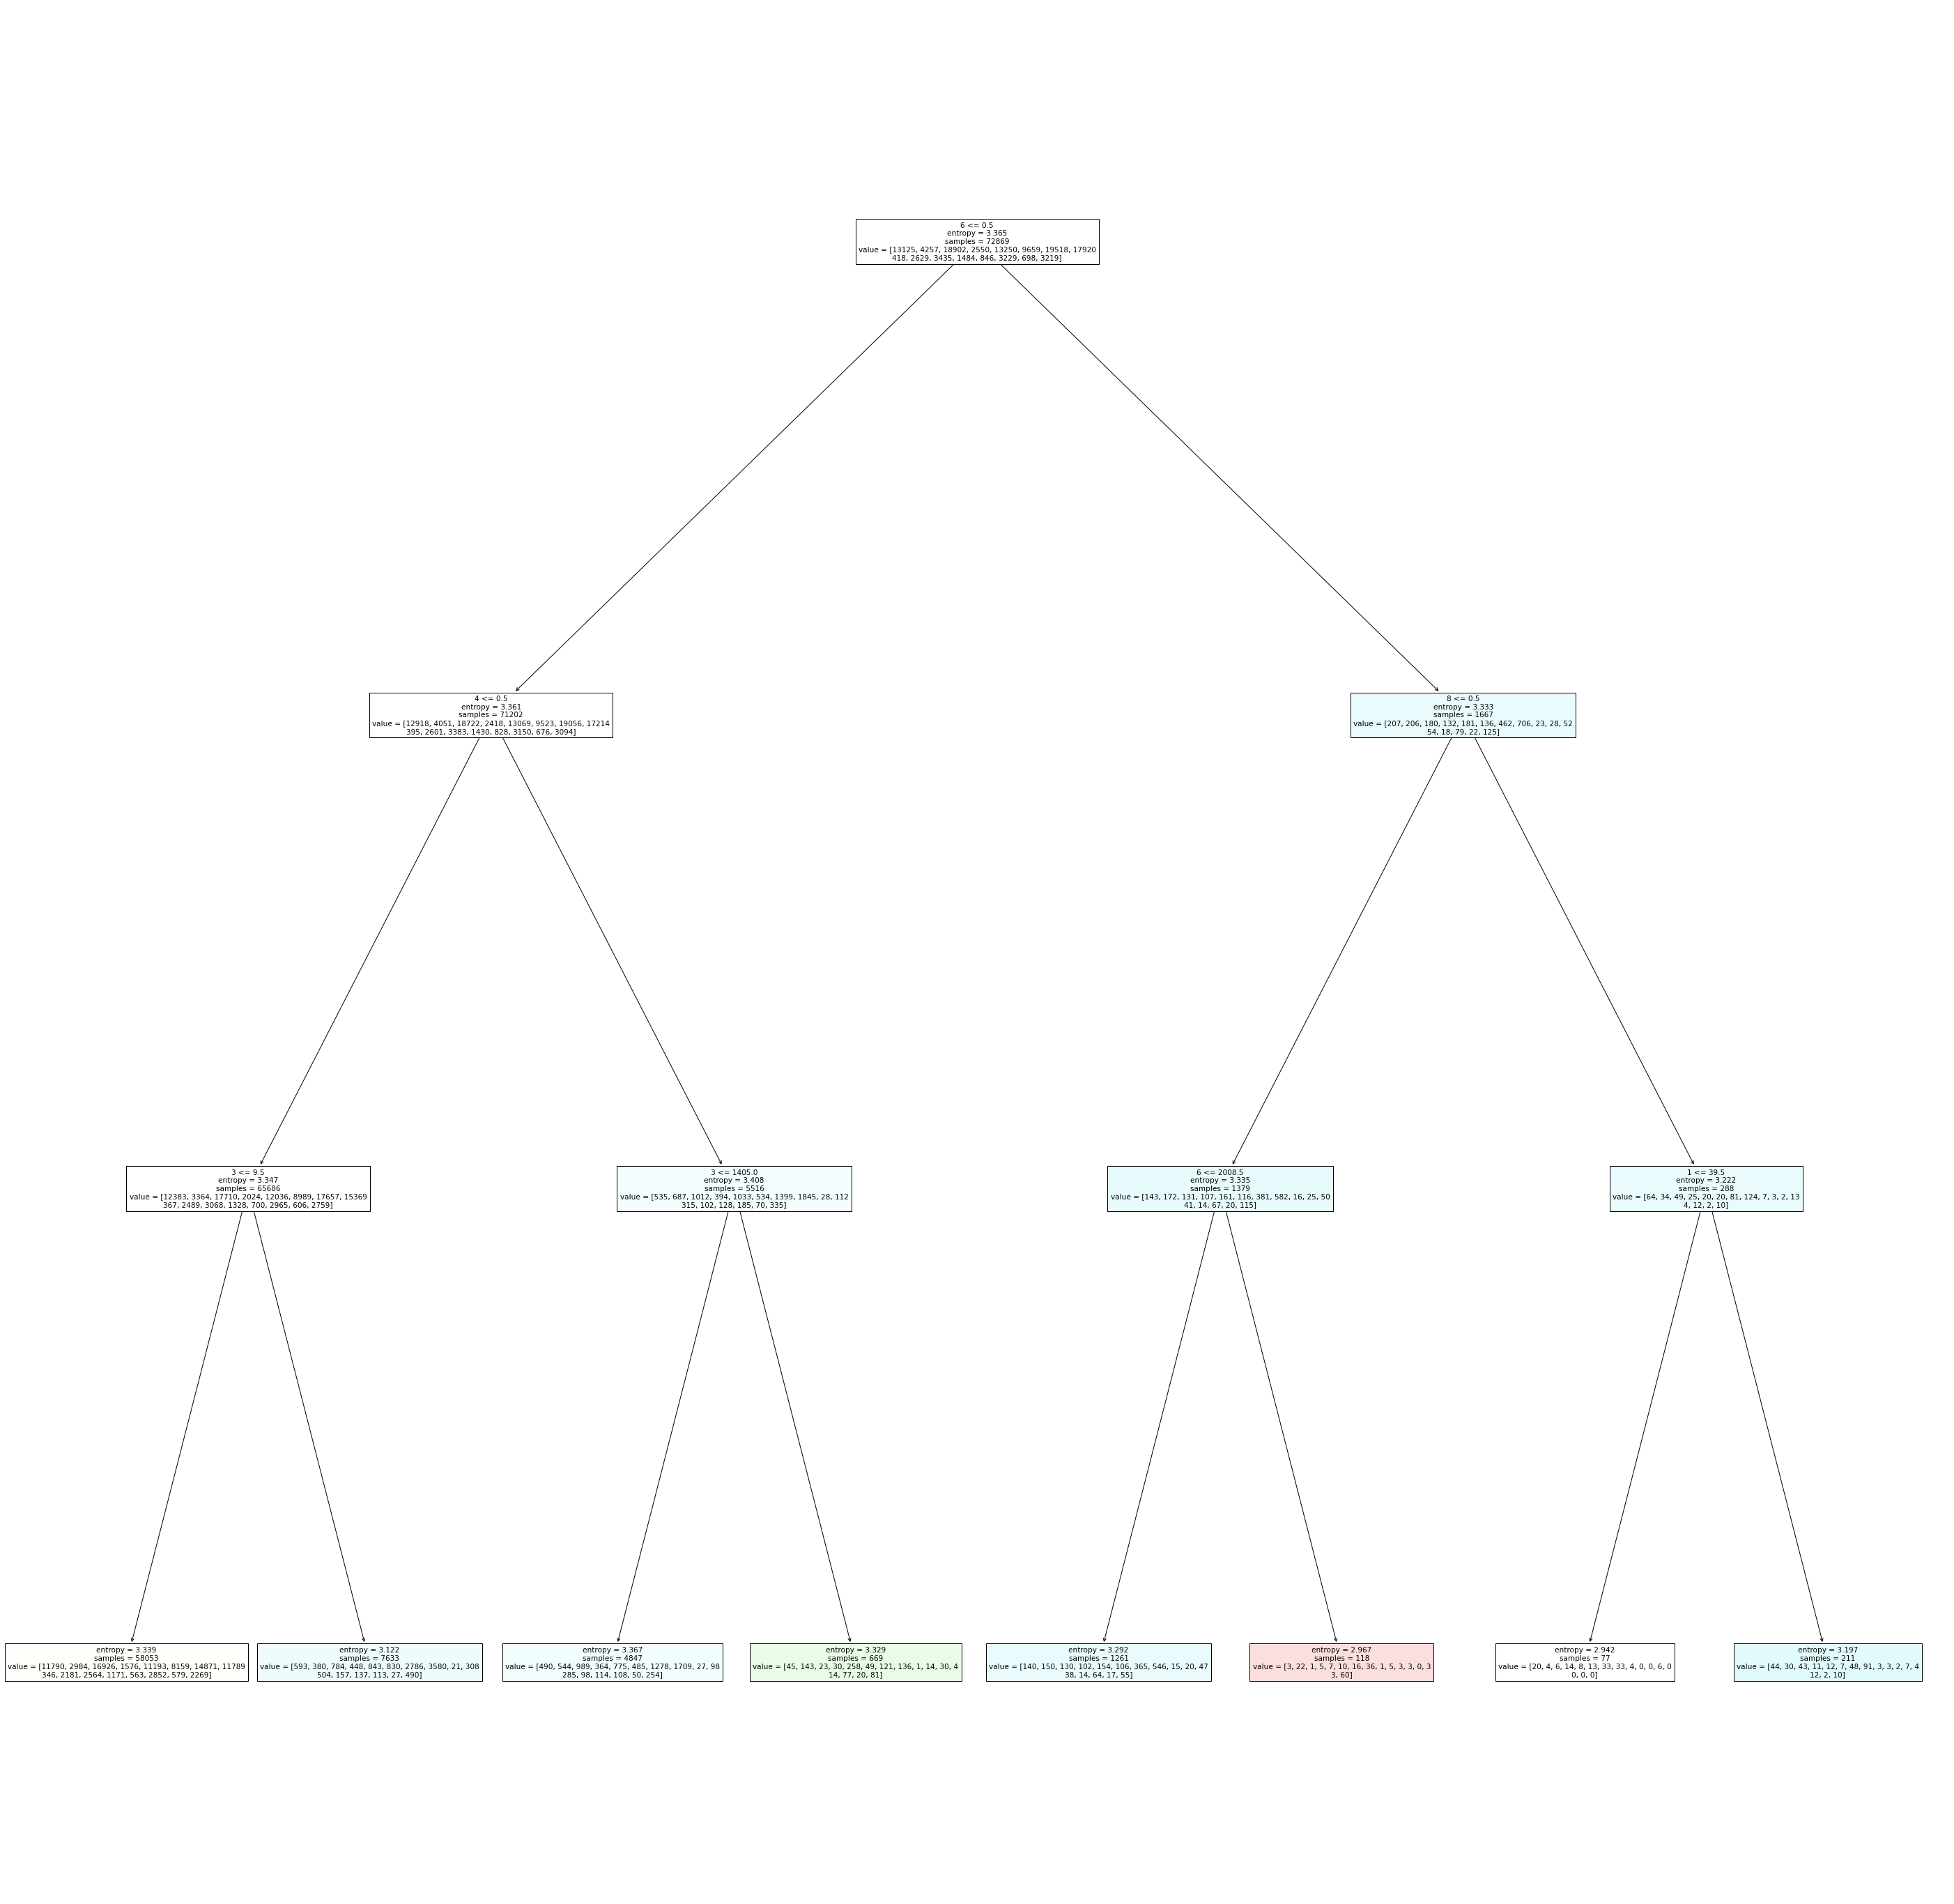

In [21]:
plt.figure(figsize=(50,50))
_ = tree.plot_tree(expandedTree.estimators_[0], feature_names=x_train.columns, filled=True)

In [18]:
viz_model = dtree.model(expandedTree[0], X_train=x_train, y_train=y_train, feature_names=y_train.columns)##,
##                           feature_names=iris.feature_names,
  ##                         target_name='iris',
    ##                       class_names=iris.target_names)
##viz = dtree(expandedTree.estimators_[0], x_train, y_train, feature_names=x_train.columns, target_name="Target")
viz_model.view()

AttributeError: 'DataFrame' object has no attribute 'dtype'